In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense,BatchNormalization
import keras
import shutil
import os

In [2]:
x = []
y = []
datadir = r'/kaggle/input/flowers/flowers'
Categories = []
for file_label in os.listdir(datadir):
    Categories.append(file_label)
    for file_name in os.listdir(datadir+'/'+file_label):
        x.append(datadir+'/'+file_label+'/'+file_name)
        y.append(file_label)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=34)

In [4]:
print("x_train = ",len(x_train))
print("x_test = ",len(x_test))

x_train =  12592
x_test =  3148


In [5]:
os.mkdir('/kaggle/working/train')
os.mkdir('/kaggle/working/test')

In [6]:
datadir = r'/kaggle/working/'
for file_label in Categories:
    os.mkdir('/kaggle/working/train/'+file_label)
    new='/kaggle/working/train/'+file_label
    for file_name in x_train :
        if(file_name.find(file_label) != -1 ):
            shutil.copy2(file_name, new)


In [7]:
for file_label in Categories:
    os.mkdir('/kaggle/working/test/'+file_label)
    new='/kaggle/working/test/'+file_label
    for file_name in x_test :
        if(file_name.find(file_label))>0:
            shutil.copy2(file_name, new)


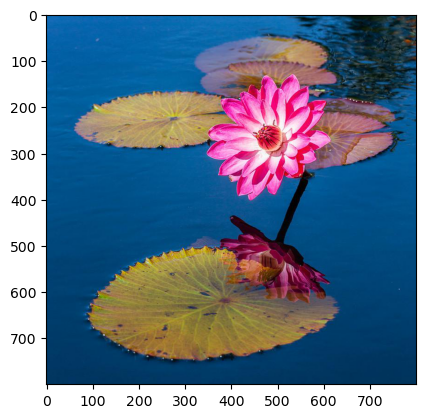

In [8]:
image = load_img(x_train[45])
plt.imshow(image)

In [9]:
image.size

(800, 800)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(
    '/kaggle/working/train', 
    color_mode="rgb",
    target_size=(256,256),
    batch_size=25,
    class_mode='categorical'
)

Found 12592 images belonging to 16 classes.


In [12]:
test_set = test_datagen.flow_from_directory(
    '/kaggle/working/test', 
    color_mode="rgb",
    target_size=(256,256),
    batch_size=10,
    class_mode='categorical'
)

Found 3148 images belonging to 16 classes.


In [13]:

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax')) # 16 because we have 16 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                        

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    mode='max'
)
res = model.fit(training_set,
          epochs = 32,
          callbacks=[custom_early_stopping],
          validation_data = test_set)

Epoch 1/32


2023-04-08 19:57:44.754847: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


504/504 [==============================] - 205s 384ms/step - loss: 2.0631 - accuracy: 0.3815 - val_loss: 1.7585 - val_accuracy: 0.4155
Epoch 2/32
504/504 [==============================] - 197s 392ms/step - loss: 1.4772 - accuracy: 0.5217 - val_loss: 1.3052 - val_accuracy: 0.5861
Epoch 3/32
504/504 [==============================] - 193s 382ms/step - loss: 1.2285 - accuracy: 0.5995 - val_loss: 1.5867 - val_accuracy: 0.5251
Epoch 4/32
504/504 [==============================] - 194s 386ms/step - loss: 1.1060 - accuracy: 0.6372 - val_loss: 1.1386 - val_accuracy: 0.6296
Epoch 5/32
504/504 [==============================] - 194s 384ms/step - loss: 1.0151 - accuracy: 0.6661 - val_loss: 0.9172 - val_accuracy: 0.6912
Epoch 6/32
504/504 [==============================] - 193s 384ms/step - loss: 0.9447 - accuracy: 0.6920 - val_loss: 1.1134 - val_accuracy: 0.6604
Epoch 7/32
504/504 [==============================] - 195s 387ms/step - loss: 0.8765 - accuracy: 0.7137 - val_loss: 1.7875 - val_accura

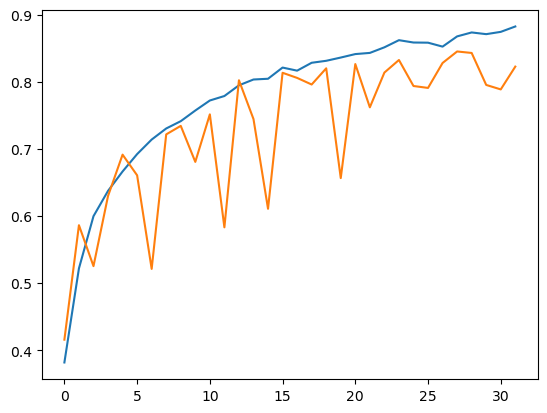

In [15]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])

In [16]:
model.evaluate(test_set)

315/315 [==============================] - 9s 28ms/step - loss: 0.6267 - accuracy: 0.8224


[0.6267348527908325, 0.8224269151687622]

In [17]:
predict=model.predict(test_set)
predict=np.argmax(predict,axis = 1)
from sklearn.metrics import accuracy_score
Acc = accuracy_score(test_set.classes,predict)
print("Accuracy = ", Acc)

315/315 [==============================] - 8s 25ms/step
Accuracy =  0.06607369758576874
